## Exploratory Data Analysis

#### Dataset 1: Crimes

The United States crimes dataset from kaggle contained 4 csv files, each containing information about crimes for cities. They csv files are separated by population ranges.

* 'crime_40 _60.csv': dataset for population ranging from 40,000 to 60,000.

* 'crime_60 _100.csv': dataset for population ranging from 60,000 to 100,000.

* 'crime_100 _250.csv': dataset for population ranging from 100,000 to 250,000.

* 'crime_250 _plus.csv': dataset for population greater than 250,000.

We're interested in all the cities available in the dataset so we will combine the csvs into one dataframe.

First, inspecting each csv as a dataframe separately, checking columns and values.

In [65]:
import pandas as pd

In [66]:

pd.read_csv('crime/crime_250_plus.csv').head()

,states,cities,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,vehicle_theft,tot_prop_crim,arson
0,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,"1,216.84","3,730.21",506.78,"5,453.83",22.94
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",748.17,"3,619.66","1,047.98","5,415.82",20.93
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.38,259.47,314.41,"1,866.01",149.18,"2,329.61",NaN
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,192.49,"1,137.59",55.76,"1,385.85",12.39
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,637.45,"3,426.36",466.56,"4,530.37",19.26


In [67]:
pd.read_csv('crime/crime_100_250.csv').head()


,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,Texas,Abilene,"119,886",393.7,2.5,31.7,105.9,253.6,"3,664.3",865,"2,656.7",142.6
1,Ohio,Akron,"198,390",886.6,12.1,84.2,290.8,499.5,"5,057.7","1,728.4","2,965.9",363.4
2,Virginia,Alexandria,"145,892",166.6,-,6.2,94.6,65.8,"2,049.5",192.6,"1,633.4",223.5
3,Pennsylvania,Allentown,"119,334",547.2,12.6,45.3,313.4,176,"3,857.2","1,045.8","2,503.1",308.4
4,Texas,Amarillo,"196,576",650.1,5.1,56.0,141.4,447.7,"4,527.5","1,061.7","3,145.9",320


In [68]:
pd.read_csv('crime/crime_40_60.csv').head()

,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,Pennsylvania,"Abington Township, Montgomery County","55,731",197.4,1.8,14.4,70.0,111.2,1979.1,296.1,1650.8,32.3
1,Oregon,Albany,"51,084",86.1,0.0,19.6,45.0,21.5,3092.9,438.5,2470.4,184.0
2,Louisiana,Alexandria,"48,449",1682.2,18.6,28.9,293.1,1341.6,7492.4,2010.4,5102.3,379.8
3,California,Aliso Viejo,"48,999",87.8,0.0,0.0,12.2,75.5,847.0,208.2,612.3,26.5
4,Florida,Altamonte Springs,"42,296",335.7,2.4,21.3,82.8,229.3,3057.0,427.9,2463.6,165.5


In [69]:
pd.read_csv('crime/crime_60_100.csv').head()

,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,California,Alameda,"75,467",212.0,1.3,11.91,106.0,92.8,"2,507.1",392.2,"1,723.9",390.9
1,Georgia,Albany,"78,512","1,035.5",5.1,34.4,285.3,710.7,"6,369.7","1,793.4","4,291.1",285.3
2,New York,Albany,"98,187",816.8,4.1,43.8,253.6,515.3,"4,420.1",903.4,"3,359.9",156.8
3,California,Alhambra,"84,469",176.4,-,2.4,78.1,95.9,"2,271.8",384.8,"1,585.2",301.9
4,Texas,Allen,"88,783",61.9,-,12.4,14.6,34.9,"1,612.9",242.2,"1,321.2",49.6


After inspecting the csvs, combine all of them into a dataframe called crime.

In [70]:
import pandas as pd
import os

directories = ['crime', 'income']

dfs = []

# this gets the filenames of all of the csv files 
filenames = os.listdir('crime')
filenames = [f for f in filenames if os.path.isfile(os.path.join('crime', f))]

for filename in filenames:
    df = pd.read_csv(f'crime/{filename}')
    dfs.append(df)


crime = pd.concat(dfs, ignore_index=True)
    

In [71]:
# checking the number of rows and columns
crime.shape

(975, 16)

Other EDA tasks such as inspecting individual columns and why there are duplicate values. There are multiple cities with the same name but from different states which is why there's duplicates in cities.

In [72]:
crime['cities'].nunique()

889

In [73]:
crime['cities'].value_counts() 

cities
Springfield        5
Lakewood           4
Albany             3
Columbus           3
Newark             3
                  ..
Davis              1
Daytona Beach      1
Dearborn           1
Deerfield Beach    1
Yucaipa            1
Name: count, Length: 889, dtype: int64

clean up cities column by remvoving uneccesary characters and values from the city name

In [74]:
crime['cities'] = crime['cities'].str.replace(r'\d+', '', regex=True)

In [75]:
crime['violent_crime'] = crime['violent_crime'].fillna(crime['tot_violent_crime'])
crime['prop_crime'] = crime['prop_crime'].fillna(crime['tot_prop_crim'])

Dropping columns because they're not present across all datasets. The crimes csv file for cities with population of 250,000+ contained 4 extra columns that are not in the other 3 datasets so there's no information on these columns for cities under 250,000 population and they appear as null values in the dataframe, so we can drop those columns.

In [76]:
crime.drop(columns = ['total_crime','arson', 'tot_prop_crim', 'tot_violent_crime'], inplace = True)

In [77]:
crime.dtypes

states            object
cities            object
population        object
murder            object
rape              object
robbery          float64
agrv_assault      object
burglary          object
larceny           object
vehicle_theft     object
violent_crime     object
prop_crime        object
dtype: object

In [78]:
# more data cleaning
crime.replace('-', '0', inplace=True)

change the datatype of columns to proper format

In [ ]:

    
crime['population'] = crime['population'].str.replace(',', '').astype(int)
crime['murder'] = crime['murder'].astype(float)
crime['rape'] = crime['rape'].astype(float)
crime['agrv_assault'] = crime['agrv_assault'].astype(float)
crime['burglary'] = crime['burglary'].astype(float)
crime['larceny'] = crime['larceny'].str.replace(',', '').astype(float)
crime['vehicle_theft'] = crime['vehicle_theft'].str.replace(',', '').astype(float)
crime['violent_crime'] = crime['violent_crime'].str.replace(',', '').astype(float)
crime['prop_crime'] = crime['prop_crime'].str.replace(',', '').astype(float)


In [80]:
crime.head()

,states,cities,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Alabama,Mobile,248431,20.13,58.16,177.11,485.85,"1,216.84","3,730.21",506.78,740.25,"5,453.83"
1,Alaska,Anchorage,296188,9.12,132.01,262.67,799.49,748.17,"3,619.66","1,047.98","1,203.29","5,415.82"
2,Arizona,Chandler,249355,2.01,52.13,56.95,148.38,314.41,"1,866.01",149.18,259.47,"2,329.61"
3,Arizona,Gilbert,242090,2.07,16.11,21.07,46.26,192.49,"1,137.59",55.76,85.51,"1,385.85"
4,Arizona,Glendale,249273,4.81,38.91,192.96,251.53,637.45,"3,426.36",466.56,488.22,"4,530.37"


Converting the cleaned crime dataset into a csv for analysis

In [17]:
crime.to_csv('cleaned_crime.csv', index=False)

#### Dataset 2: Median Income

Inspecting the Median Income dataset

In [43]:
median_income = pd.read_csv('med_income_23/ACSST1Y2023.S1902-Data.csv')
median_income.head()

,GEO_ID,NAME,S1902_C01_001E,S1902_C01_001M,S1902_C01_002E,S1902_C01_002M,S1902_C01_003E,S1902_C01_003M,S1902_C01_004E,S1902_C01_004M,...,S1902_C03_024M,S1902_C03_025E,S1902_C03_025M,S1902_C03_026E,S1902_C03_026M,S1902_C03_027E,S1902_C03_027M,S1902_C03_028E,S1902_C03_028M,Unnamed: 170
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,NaN
1,1600000US0103076,"Auburn city, Alabama",32859,1762,27185,1924,27047,1915,1712,693,...,N,18978,14648,22007,15372,15626,9545,35194,4147,NaN
2,1600000US0107000,"Birmingham city, Alabama",91740,3237,66120,3487,64293,3437,6016,1381,...,N,10281,4389,20758,6261,21427,5335,60598,10806,NaN
3,1600000US0121184,"Dothan city, Alabama",30920,869,23096,900,22411,899,2229,528,...,N,13038,6614,22736,5538,18799,4701,44209,2830,NaN
4,1600000US0135896,"Hoover city, Alabama",38178,1757,32222,1735,30902,1699,5522,1529,...,N,15743,18236,51787,21239,51446,27125,64535,8604,NaN


Since the original column names are unclear, we will rename them based on what they should be

In [44]:
median_income = median_income[['NAME','S1902_C01_001E']]
median_income.drop(index=0, inplace = True)
median_income.rename(columns={'NAME': 'City', 'S1902_C01_001E': 'Median Income'}, inplace=True)

We're only performing analysis on U.S cities so we only want to keep data for cities in the United States. Here we are also performing data cleaning by removing unnecessary words/characters in columns and separating the city and state into separate columns.

In [45]:

us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
    'West Virginia', 'Wisconsin', 'Wyoming'
]



# clean up the city names in the City column by removing unnecessary descriptors (like "city", "town", etc.) that may be included in the names. 
median_income['City'] = median_income['City'].str.replace(r'\s*(city|town|CDP|municipality)\s*', '', regex=True).str.strip()


#df.drop(columns=['Location'], inplace=True)

median_income['State'] = median_income['City'].str.split(', ').str[1]  # Extract the state and put in its own column

median_income['City'] = median_income['City'].apply(lambda x: x.split(',')[0].strip()) # Keep the city in its own column

# Filter the DataFrame to keep only U.S. cities
df_us = median_income[median_income['State'].isin(us_states)]  # Keep only rows where the state is in the list

#df_us.drop(columns=['State'], inplace=True)

df_us

,City,Median Income,State
1,Auburn,32859,Alabama
2,Birmingham,91740,Alabama
3,Dothan,30920,Alabama
4,Hoover,38178,Alabama
5,Huntsville,99557,Alabama
...,...,...,...
639,Milwaukee,227173,Wisconsin
640,Oshkosh,28147,Wisconsin
641,Racine,31700,Wisconsin
642,Waukesha,30668,Wisconsin


In [21]:
df_us.to_csv('cleaned_income.csv', index=False)

#### Merging the Two Datasets

Now that the data is cleaned, we can merge it together so it can be more convenient for statistical analysis.

In [142]:
merged_data = pd.merge(df_us, crime, left_on=['City', 'State'], right_on=['cities','states'], how='inner')

In [143]:
merged_data.head()

,City,Median Income,State,states,cities,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Auburn,32859,Alabama,Alabama,Auburn,54785,5.5,23.7,45.6,166.1,763.0,2646.7,93.1,240.9,3502.8
1,Birmingham,91740,Alabama,Alabama,Birmingham,213266,31.4,71.3,460.9,954.2,"2,205.7","4,239.8",488.6,"1,517.8","6,934.1"
2,Dothan,30920,Alabama,Alabama,Dothan,66275,7.5,45.3,150.9,277.6,"1,336.9","2,894.0",196.2,481.3,"4,427.0"
3,Hoover,38178,Alabama,Alabama,Hoover,82332,2.4,15.8,55.9,30.4,477.3,"2,067.2",103.2,104.5,"2,647.8"
4,Huntsville,99557,Alabama,Alabama,Huntsville,183691,7.6,39.2,248.2,628.2,"1,178.6","3,476.5",386.5,923.3,"5,041.6"


Drop redundant columns from merging

In [195]:
merged_data = merged_data.drop(['states', 'cities'], axis = 1)

In [132]:
merged_data.isnull().sum()

City             0
Median Income    0
State            0
population       0
murder           0
rape             0
robbery          0
agrv_assault     0
burglary         0
larceny          0
vehicle_theft    0
violent_crime    0
prop_crime       0
dtype: int64

In [133]:
merged_data.head()

,City,Median Income,State,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Auburn,32859,Alabama,54785,5.5,23.7,45.6,166.1,763.0,2646.7,93.1,240.9,3502.8
1,Birmingham,91740,Alabama,213266,31.4,71.3,460.9,954.2,"2,205.7","4,239.8",488.6,"1,517.8","6,934.1"
2,Dothan,30920,Alabama,66275,7.5,45.3,150.9,277.6,"1,336.9","2,894.0",196.2,481.3,"4,427.0"
3,Hoover,38178,Alabama,82332,2.4,15.8,55.9,30.4,477.3,"2,067.2",103.2,104.5,"2,647.8"
4,Huntsville,99557,Alabama,183691,7.6,39.2,248.2,628.2,"1,178.6","3,476.5",386.5,923.3,"5,041.6"


Converting the merged income and crimes dataframe into csv file

In [307]:
merged_data.to_csv('income_and_crimes.csv', index=False)

#### EDA Visualizations

Converting to proper data types for visualizations in Matplotlib and seaborn to work properly

In [192]:
merged_data['murder'] = merged_data['murder'].astype(float)
merged_data['rape'] = merged_data['rape'].astype(float)
merged_data['robbery'] = merged_data['robbery'].astype(float)
merged_data['agrv_assault'] = merged_data['agrv_assault'].str.replace(',', '').astype(float)
merged_data['vehicle_theft'] = merged_data['vehicle_theft'].str.replace(',', '').astype(float)
merged_data['violent_crime'] = merged_data['violent_crime'].str.replace(',', '').astype(float)
merged_data['burglary'] = merged_data['burglary'].str.replace(',', '').astype(float)
merged_data['prop_crime'] = merged_data['prop_crime'].str.replace(',', '').astype(float)
merged_data['Median Income'] = merged_data['Median Income'].str.replace(',', '').astype(float)

In [205]:
merged_data.dtypes

City              object
Median Income    float64
State             object
population         int64
murder           float64
rape             float64
robbery          float64
agrv_assault     float64
burglary         float64
larceny          float64
vehicle_theft    float64
violent_crime    float64
prop_crime       float64
dtype: object

/var/folders/3q/czkd7jjj6y36rt7k0wkjkphw0000gn/T/ipykernel_58457/2387311170.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Median Income'].fillna(average_income, inplace=True)


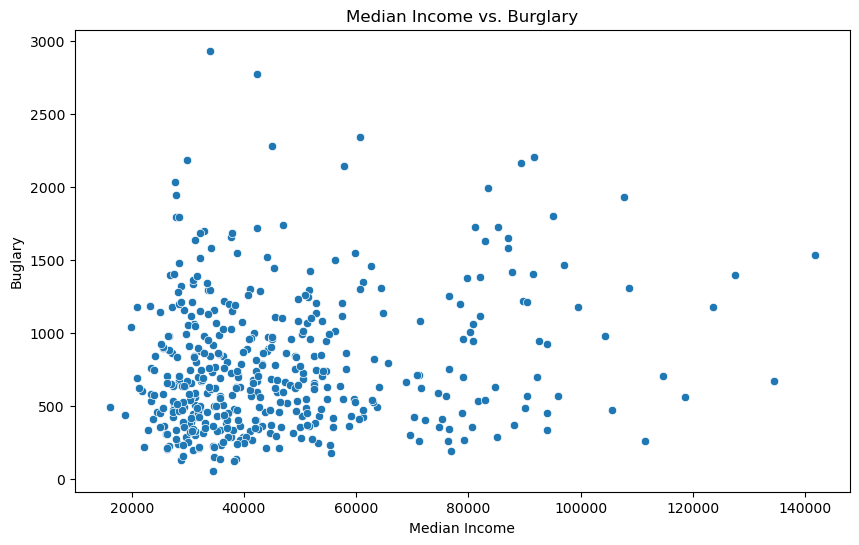

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
merged_data['Median Income'] = merged_data['Median Income'].replace('N', np.nan)
merged_data['Median Income'] = merged_data['Median Income'].str.replace(',', '').astype(float)
average_income = merged_data['Median Income'].mean()

merged_data['Median Income'].fillna(average_income, inplace=True)
merged_data['Median Income'] = merged_data['Median Income'].astype(int)
merged_data['burglary'] = merged_data['burglary'].str.replace(',', '').astype(float)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Median Income', y='burglary')

plt.title('Median Income vs. Burglary')
plt.xlabel('Median Income')
plt.ylabel('Buglary')
#plt.grid()
plt.show()

In [135]:
merged_data.describe()

,Median Income,population,murder,rape,robbery,burglary
count,483.000000,483.000000,483.000000,483.000000,483.000000,444.000000
mean,45058.433610,106586.772257,4.660248,29.750331,131.802692,771.609910
std,21112.415264,47523.318263,7.345204,23.544051,123.209925,457.321445
min,16131.000000,44881.000000,0.000000,0.000000,1.800000,58.100000
25%,30347.500000,71087.000000,0.950000,13.150000,45.250000,434.275000
50%,38270.000000,91846.000000,2.500000,26.200000,100.100000,657.900000
75%,52467.000000,125601.500000,5.900000,39.500000,175.200000,1009.575000
max,141669.000000,249830.000000,86.300000,265.700000,972.100000,2931.200000


Outliers of Median Income

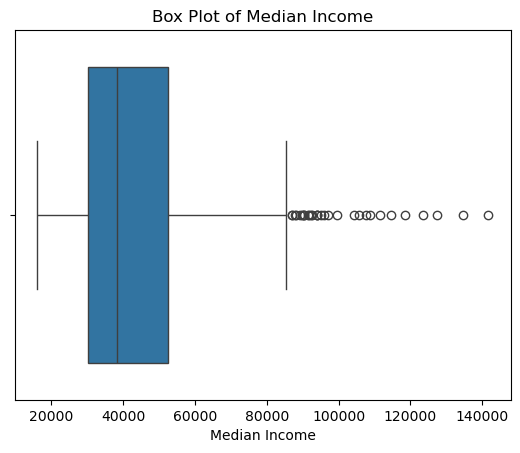

In [211]:
sns.boxplot(x=merged_data['Median Income'])
plt.title('Box Plot of Median Income')
plt.xlabel('Median Income')
plt.show()

We can also analyze correlation between all the numeric crime variables

In [204]:
only_numeric = merged_data.drop(columns=['City', 'State'])
correlation_matrix = only_numeric.corr()

correlation_matrix

,Median Income,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
Median Income,1.000000,0.504426,0.028606,0.003798,0.049342,0.073383,0.098977,0.102120,-0.011327,0.057297,0.101992
population,0.504426,1.000000,0.143580,0.046967,0.207968,0.098445,0.179733,0.162807,0.148846,0.113414,0.196679
murder,0.028606,0.143580,1.000000,0.355285,0.766766,0.657239,0.578613,0.241111,0.410119,0.751137,0.421260
rape,0.003798,0.046967,0.355285,1.000000,0.374987,0.506188,0.441450,0.415363,0.178713,0.543052,0.464277
robbery,0.049342,0.207968,0.766766,0.374987,1.000000,0.739143,0.692066,0.337467,0.552628,0.883483,0.549172
agrv_assault,0.073383,0.098445,0.657239,0.506188,0.739143,1.000000,0.644637,0.404949,0.363085,0.964694,0.551142
burglary,0.098977,0.179733,0.578613,0.441450,0.692066,0.644637,1.000000,0.584159,0.481566,0.707513,0.810462
larceny,0.102120,0.162807,0.241111,0.415363,0.337467,0.404949,0.584159,1.000000,0.229153,0.419731,0.934438
vehicle_theft,-0.011327,0.148846,0.410119,0.178713,0.552628,0.363085,0.481566,0.229153,1.000000,0.449126,0.478917
violent_crime,0.057297,0.113414,0.751137,0.543052,0.883483,0.964694,0.707513,0.419731,0.449126,1.000000,0.595082


Correlation matrix heatmap to better visualize the matrix above

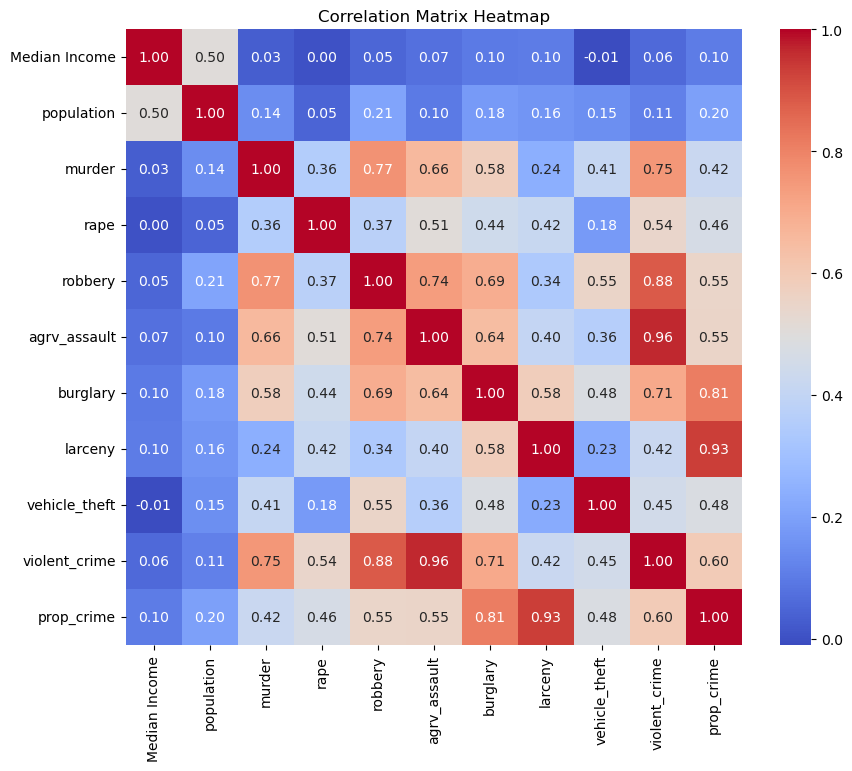

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()